In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Завантаження даних
dataset_path = 'MobilePriceClassificationDatasets.csv'
df = pd.read_csv(dataset_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Перевірка відсутніх значень
print("\nПеревірка відсутніх значень:")
print(df.isna().sum())

# Вибір ознак і цільової змінної
X = df[['battery_power', 'clock_speed', 'fc', 'pc', 'sc_h', 'sc_w', 'ram', 'int_memory', 'touch_screen', 'wifi']]
y = df['price_range']


Перевірка відсутніх значень:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [ ]:
# Розділення на навчальний і тестовий набори
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print(X_train)

      battery_power  clock_speed  fc  pc  sc_h  sc_w   ram  int_memory  \
0               902          0.6   0  14    18     8  3654          63   
1              1197          0.5   9  10    19     7  2885          20   
2              1519          2.1   0  10    11    10  2912          32   
3              1971          0.5   0  19     8     7   571          40   
4               882          0.7   9  16    19    11   751          28   
...             ...          ...  ..  ..   ...   ...   ...         ...   
1395           1975          1.9   2  17    13     5  3022          31   
1396            589          0.5   1   4    16    10   362          59   
1397           1829          0.5   0   7    16    11  2080          15   
1398           1927          0.9   3  12    16    11  2916          11   
1399            635          0.6   1  13    13    12  2107          50   

      touch_screen  wifi  
0                1     1  
1                1     1  
2                1     0  
3  

In [ ]:
# Стандартизація ознак
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(f'X test:\n{X_test_scaled.head()}')
print(f'\nX train:\n{X_train_scaled.head()}')
print(f'\ny test:\n{y_test}')
print(f'\ny train:\n{y_train}')

X test:
   battery_power  clock_speed        fc        pc      sc_h      sc_w  \
0       0.915888     1.181201 -0.293030 -0.814054 -0.991123  0.079727   
1      -0.131719    -1.243552  0.632502  1.013414  1.613980  2.600856   
2       1.651923     1.666151  1.095268  1.345682 -0.991123 -1.066241   
3      -0.567469     0.575013 -0.061647  1.511815  1.377152  0.308920   
4      -1.411876    -1.243552  0.632502 -0.315654  0.429842 -0.149467   

        ram  int_memory  touch_screen      wifi  
0 -1.327357   -0.396739      0.991465 -0.998572  
1  0.406926   -1.328218     -1.008608 -0.998572  
2 -0.745259   -0.999461      0.991465 -0.998572  
3  1.634877   -0.835082      0.991465 -0.998572  
4 -0.200119    1.411425     -1.008608 -0.998572  

X train:
   battery_power  clock_speed        fc        pc      sc_h      sc_w  \
0      -0.763895    -1.122314 -0.987179  0.681147  1.377152  0.538114   
1      -0.097852    -1.243552  1.095268  0.016613  1.613980  0.308920   
2       0.629151     0.6

print("LinearSVC - Звіт по класифікації:")
print(classification_report(y_test, y_pred_svc))

Генерує текстовий звіт із такими метриками для кожного класу:
- Precision (Точність): частка правильних передбачень для кожного класу.
- Recall (Повнота): частка правильно передбачених значень серед усіх справжніх значень цього класу.
- F1-score: гармонійне середнє між Precision і Recall.
- Стовпець Support у текстовому звіті classification_report показує кількість зразків (рядків) у тестовому наборі, які належать до кожного класу.

In [ ]:
# Навчання та оцінка моделей + LinearSVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

svc_model = LinearSVC(random_state=42, max_iter=10000) # порожня модель LinearSVC, яка ще не навчена
svc_model.fit(X_train_scaled, y_train) # вже натренована модель
y_pred_svc = svc_model.predict(X_test_scaled) #масив передбачених класів для кожного рядка тестових даних

print("LinearSVC - Звіт по класифікації:")
print(classification_report(y_test, y_pred_svc))

print("Матриця неточностей для LinearSVC:")
print(confusion_matrix(y_test, y_pred_svc))

LinearSVC - Звіт по класифікації:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       151
           1       0.68      0.58      0.62       146
           2       0.64      0.55      0.59       148
           3       0.81      0.92      0.86       155

    accuracy                           0.75       600
   macro avg       0.74      0.75      0.74       600
weighted avg       0.74      0.75      0.74       600

Матриця неточностей для LinearSVC:
[[145   6   0   0]
 [ 30  84  32   0]
 [  0  34  81  33]
 [  0   0  13 142]]


print("Матриця неточностей :")
print(confusion_matrix(y_test, y_pred_svc))

Створює матрицю, яка показує, скільки разів модель передбачила кожен клас правильно чи помилково.

наприклад:
145: модель правильно передбачила клас 0 (True Positive).
6: модель помилково передбачила клас 1 для зразків, які насправді належать до класу 0 (False Positive).
0: жоден зразок класу 0 не був передбачений як клас 2.
0: жоден зразок класу 0 не був передбачений як клас 3.

In [ ]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)

print("\nGaussianNB - Звіт по класифікації:")
print(classification_report(y_test, y_pred_nb))
print("Матриця неточностей для GaussianNB:")
print(confusion_matrix(y_test, y_pred_nb))


GaussianNB - Звіт по класифікації:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       151
           1       0.72      0.69      0.70       146
           2       0.66      0.67      0.66       148
           3       0.82      0.82      0.82       155

    accuracy                           0.77       600
   macro avg       0.77      0.77      0.77       600
weighted avg       0.77      0.77      0.77       600

Матриця неточностей для GaussianNB:
[[133  18   0   0]
 [ 21 101  24   0]
 [  0  22  99  27]
 [  0   0  28 127]]


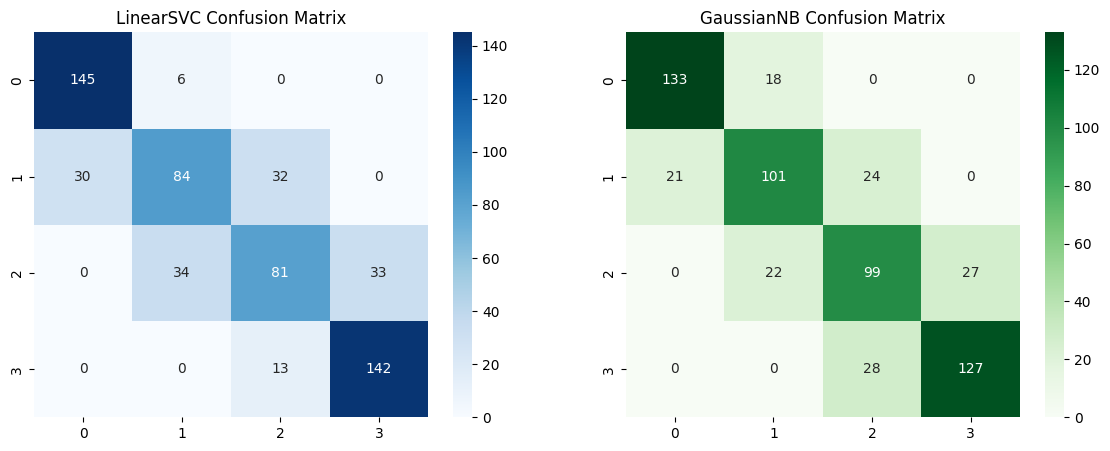

In [ ]:
# Візуалізація матриць
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("LinearSVC Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("GaussianNB Confusion Matrix")
plt.show()